# Spread Between Pairs Over Time
#### > Visualize spread between a pair of cointegrated stocks. Choose from dropdown menu.

In [11]:
# import necessary libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, Dropdown

Setup data for reading

In [12]:
# set up a directory to successes folder. this folder contains cointegrated pairs
data_directory = "../../data/processed/successes/"

# set up a list of .csv file names
csv_files = []
for file in os.listdir(data_directory):
    if file.endswith(".csv"):
        csv_files.append(file)

Define the function to plot the spread, which will be called by the dropdown menu

In [13]:
def plot_spread(file_name):
    current_name = file_name.replace(".csv", "")
    stock1, stock2 = current_name.split("_")

    file_path = os.path.join(data_directory, file_name)

    data_frame = pd.read_csv(file_path)

    mean_spread = data_frame['Spread'].mean()

    # set figure size 12x6
    plt.figure(figsize=(12,6))

    # plot a horizontal line representing the mean
    plt.axhline(mean_spread, linestyle='--', label='Mean', color="#DA4343")


    # plot a graph where the dates column in our df are the x values, and spread column are the y values
    plt.plot(data_frame['Date'], data_frame['Spread'], label='Spread', color="#5f70f2")

    # remove padding
    plt.xlim(data_frame.index.min(), data_frame.index.max())

    # set x-axis ticker labels to only display every 10 values
    plt.xticks(data_frame['Date'][::10], rotation=45)

    # set titles and labels for the graph
    plt.title(f"Spread Between {stock1} and {stock2} Over time")
    plt.xlabel("Date")
    plt.ylabel("Raw Price Spread")

    # describe what the lines mean
    plt.legend(loc="upper center")

    #make background thinner and use differnt line style
    sns.set_style("whitegrid")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.style.use('seaborn-v0_8-whitegrid')

    # adjust layout to fit
    plt.tight_layout
    plt.show()


In [14]:
dropdown_choice = Dropdown(options=csv_files, description='Select a cointegrated pair to graph: ', layout=widgets.Layout(width='375px'), style={'description_width': 'auto'})

interactive(children=(Dropdown(description='Select a cointegrated pair to graph: ', layout=Layout(width='375px…

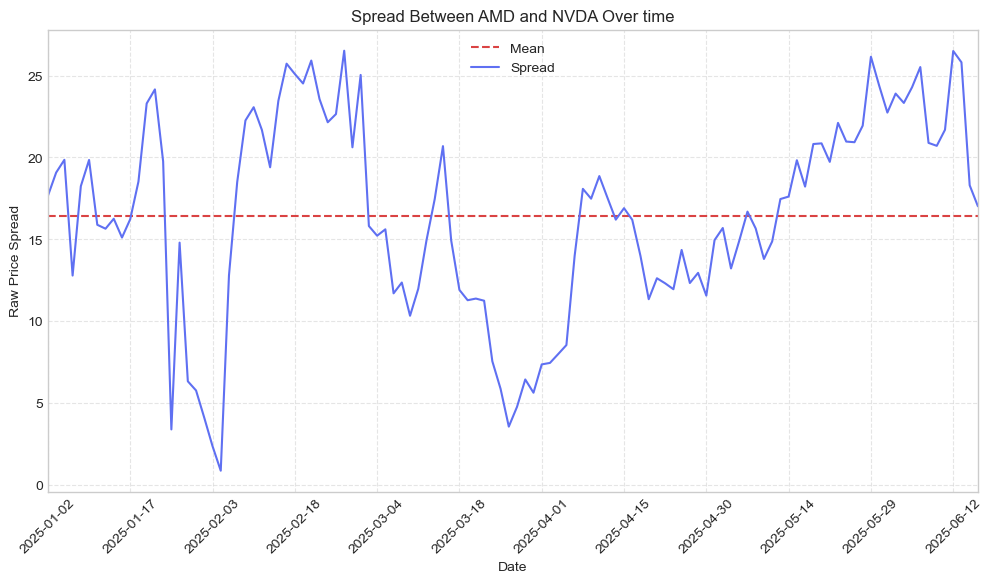

In [15]:
interact(plot_spread, file_name=dropdown_choice)
plot_spread("AMD_NVDA.csv")